In [82]:
# YOU DO NOT HAVE FE.py! So this notebook will not work

### Setup the imports

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression


# import warnings
# warnings.filterwarnings('ignore')

### Read in the data

In [2]:
train = pd.read_csv('./data/train.csv',  index_col=0)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Train-Test-Split

In [3]:
from sklearn.model_selection import train_test_split as tts
#Train-Test Split
from sklearn.model_selection import train_test_split
X = train.iloc[:, 1:]
y = train['Survived']
Xtrain, Xtest,ytrain,ytest = tts(X,y,train_size=0.9)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((801, 10), (90, 10), (801,), (90,))

#### Exploratory Data Analysis

You got the tools for this last week. Today will consist of you starting to do the exploratory data analysis

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import math
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline

In [5]:
# REPLACE NA values with age of non- and survived passengers and ...
mean_Age = train.groupby(['Survived','Sex','Pclass'])['Age'].transform('mean')
train['Age'].fillna(mean_Age, inplace=True)

In [6]:
from sklearn.preprocessing import KBinsDiscretizer
# transform a numerical column: Age
kbins = KBinsDiscretizer(n_bins=8, encode='onehot-dense', strategy='kmeans')
columns = train[['Age']]
kbins.fit(columns)
t = kbins.transform(columns)

In [7]:
# fill NA of Embarked with most frequent values, then binning 
pipeline1 = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

In [8]:
# fill NA of Embarked with most frequent values, then binning 
pipeline2 = make_pipeline(
    SimpleImputer(strategy='mean'), 
    KBinsDiscretizer(n_bins=8, encode='onehot-dense', strategy='kmeans')
)

In [9]:
pipeline3 = make_pipeline(
    SimpleImputer(strategy='mean'), 
    MinMaxScaler()
)

In [10]:
# model 1
trans = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Sex','Pclass']),
    ('scale', pipeline3, ['Fare']),
    ('impute_then_scale', pipeline2, ['Age']),
    #('impute_then_onehot',pipeline1, ['Embarked']),
    ('do_nothing', 'passthrough', ['SibSp','Parch']),
])

### Feature Engineering

In [11]:
# fit and transform training data
trans.fit(train)

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Sex', 'Pclass']),
                                ('scale',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Fare']),
                                ('impute_then_scale',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(encode='onehot-dense',
                                                                 

In [12]:
X = trans.transform(train)
y = train['Survived']

### Train an ML Model

In [13]:
m = LogisticRegression(max_iter=1000)
m.fit(X,y) #(x_train, y_train)

LogisticRegression(max_iter=1000)

### Predict on Test data

In [14]:
test = pd.read_csv('./data/test.csv',  index_col=0)
test.head(200)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1087,3,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,347465,7.8542,NaN,S
1088,1,"Spedden, Master. Robert Douglas",male,6.0,0,2,16966,134.5000,E34,C
1089,3,"Nilsson, Miss. Berta Olivia",female,18.0,0,0,347066,7.7750,NaN,S


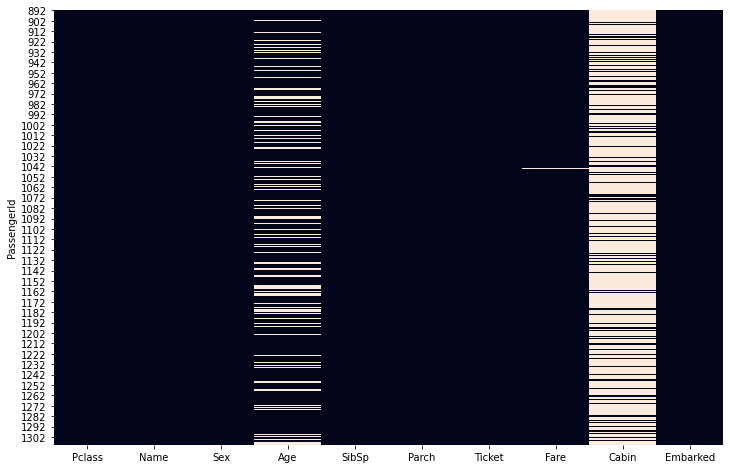

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(test.isna(), cbar=False)

In [16]:
trans.fit(test)
test1 = trans.transform(test)
ypred = m.predict(test1)

In [17]:
ypred,test

(array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 

### Submit to Kaggle

In [18]:
submission = pd.DataFrame(ypred, index=test.index, columns=['Survived'])
submission.to_csv('submission.csv')

In [19]:
# Cabin data
# Cabin data
#isolating the rooms and letters
train['Cabin_nr'] = train['Cabin'].fillna('Z',inplace=False) 
train["Deck"] = train["Cabin_nr"].str.slice(0,1)


def one_hot_column(df, label, drop_col=False):
    one_hot = pd.get_dummies(df[label], prefix=label)
    if drop_col:
        df = df.drop(label, axis=1)
    df = df.join(one_hot)
    return df

def one_hot(df, labels, drop_col=False):
    for label in labels:
        df = one_hot_column(df, label, drop_col)
    return df

train = one_hot(train, ["Deck"],drop_col=True)

In [20]:
test['Cabin_nr'] = test['Cabin'].fillna('Z',inplace=False) 
test["Deck"] = test["Cabin_nr"].str.slice(0,1)


def one_hot_column(df, label, drop_col=False):
    one_hot = pd.get_dummies(df[label], prefix=label)
    if drop_col:
        df = df.drop(label, axis=1)
    df = df.join(one_hot)
    return df

def one_hot(df, labels, drop_col=False):
    for label in labels:
        df = one_hot_column(df, label, drop_col)
    return df

test = one_hot(test, ["Deck"],drop_col=True)

In [24]:
trans = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Sex','Pclass']),
    ('scale', pipeline3, ['Fare']),
    ('impute_then_scale', pipeline2, ['Age']),
    ('impute_then_onehot',pipeline1, ['Embarked']),
    ('do_nothing', 'passthrough', ['SibSp','Parch','Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_Z']),
])

In [25]:
trans.fit(test)
test2 = trans.transform(test)
ypred = m.predict(test2)

ValueError: X has 27 features per sample; expecting 19

In [26]:
# first letter of name 
nameletter = train['Name'].str.slice(0,1)
new_numbers = [];

# letter changed to number
for n in nameletter:
  new_numbers.append(ord(n));
numbers = new_numbers;

train.loc[:,'nameletter'] = numbers
# train = one_hot(train, ['nameletter'],drop_col=True)

In [58]:
# first letter of name 
nameletter = test['Name'].str.slice(0,1)
new_numbers = [];

# letter changed to number
for n in nameletter:
  new_numbers.append(ord(n));
numbers = new_numbers;


test.loc[:,'nameletter'] = numbers
# train = one_hot(train, ['nameletter'],drop_col=True)

In [55]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nameletter
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,75
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,87
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,77
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,87
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,72
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,83
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,79
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,83


In [13]:
# first letter of name 
#ss = test['Name'].str.slice(0,1)
#test = pd.concat( [test, pd.DataFrame(ss)], axis=1 )
# test = one_hot(test, ['nameletter'],drop_col=True)
# test.assign(nameletter=test['Name'].str.slice(0,1))


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nameletter
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,K
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,W
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,M
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,W
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,H
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,O
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,S


In [11]:
# test.loc[:,'nameletter'] = test['Name'].str.slice(0,1)

In [12]:
# train.loc[:,'nameletter'] = train['Name'].str.slice(0,1)

In [59]:
trans = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Sex', 'Pclass']),
    ('scale', pipeline3, ['Fare']),
    ('impute_then_scale', pipeline2, ['Age']),
    ('impute_then_onehot',pipeline1, ['Embarked']),
    ('minmax',KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='kmeans'),['nameletter']),
    ('do_nothing', 'passthrough', ['SibSp','Parch']),
])

In [52]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [53]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nameletter
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,B
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,H
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,F
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,A
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,M
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,G
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.818182,1,2,W./C. 6607,23.4500,NaN,S,J
